EDA is an crucial steps in Data Analysis and Data Science project. It is the process of finding the dataset
to find patterns and outliers and form hypothesis based on our understanding of the dataset.

EDA includes forming summary statistics for numerical data in the dataset and creating various graphical representation to understand the data better. 

Here, we'll understand EDA with the help of an Student Performance dataset.

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns

In [5]:
# Load data

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<code>1. Descriptive Statistics</code>

In [6]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


<code>For Numerical Parameters:</code>
- Mean, standard deviation, percentiles, and maximum have been populated

<code>Categorical Features:</code>
- Count, unique, top (most frequent value) and corresponding frequency have been populated

<code>2. Missing value imputation</code>

In [7]:
# Let's check for missing values in our dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is fortunately no missing values in the dataset. Now, we'll proceed to analyze this dataset, observe patterns and identify outliers with the help of graphs and figures.

<code>Graphical Representation</code>

We'll start with Univariate Analysis. We'll be using a bar graph for this purpose. We'll look at the distribution of students across gender, race/ethnicity, their lunch status, and whether they have a test preparation course or not.

<AxesSubplot: >

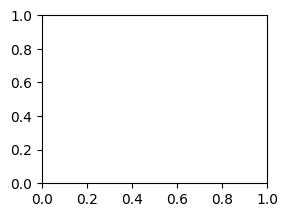

In [8]:
plt.subplot(221)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

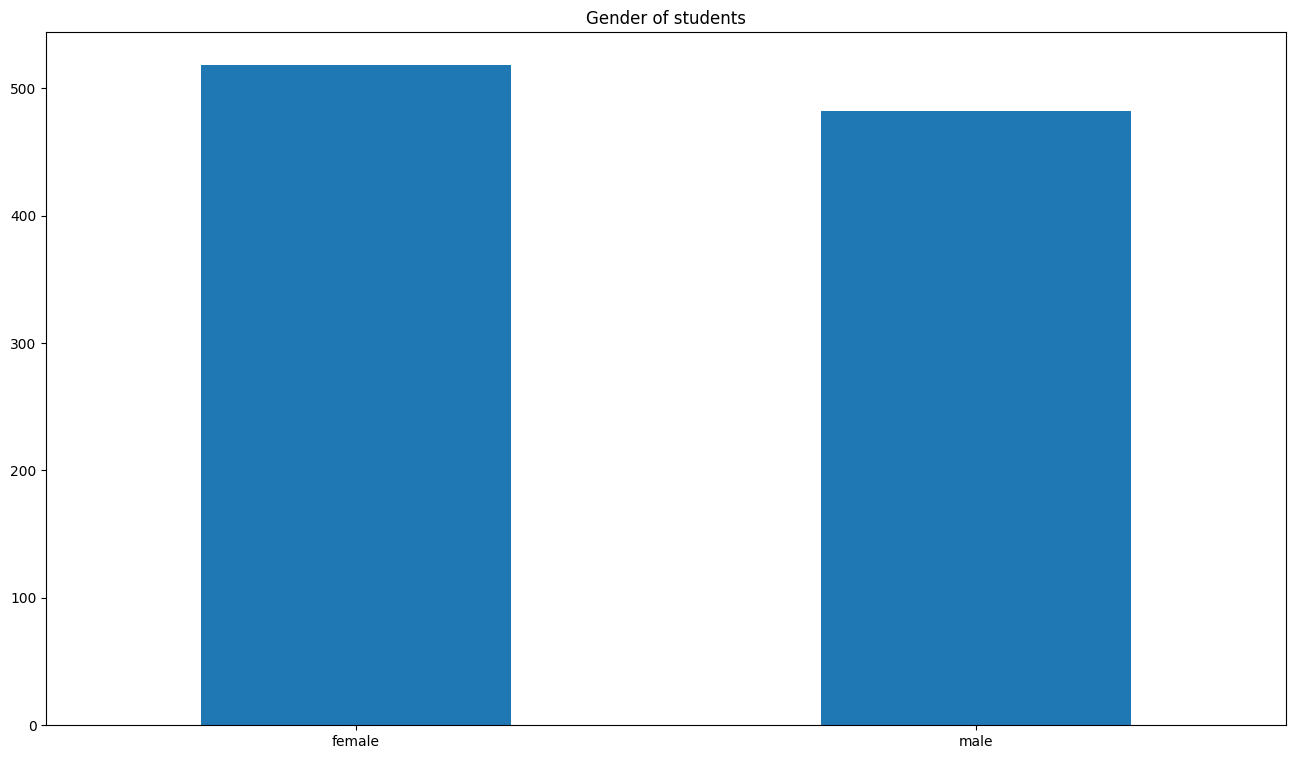

In [10]:
df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)

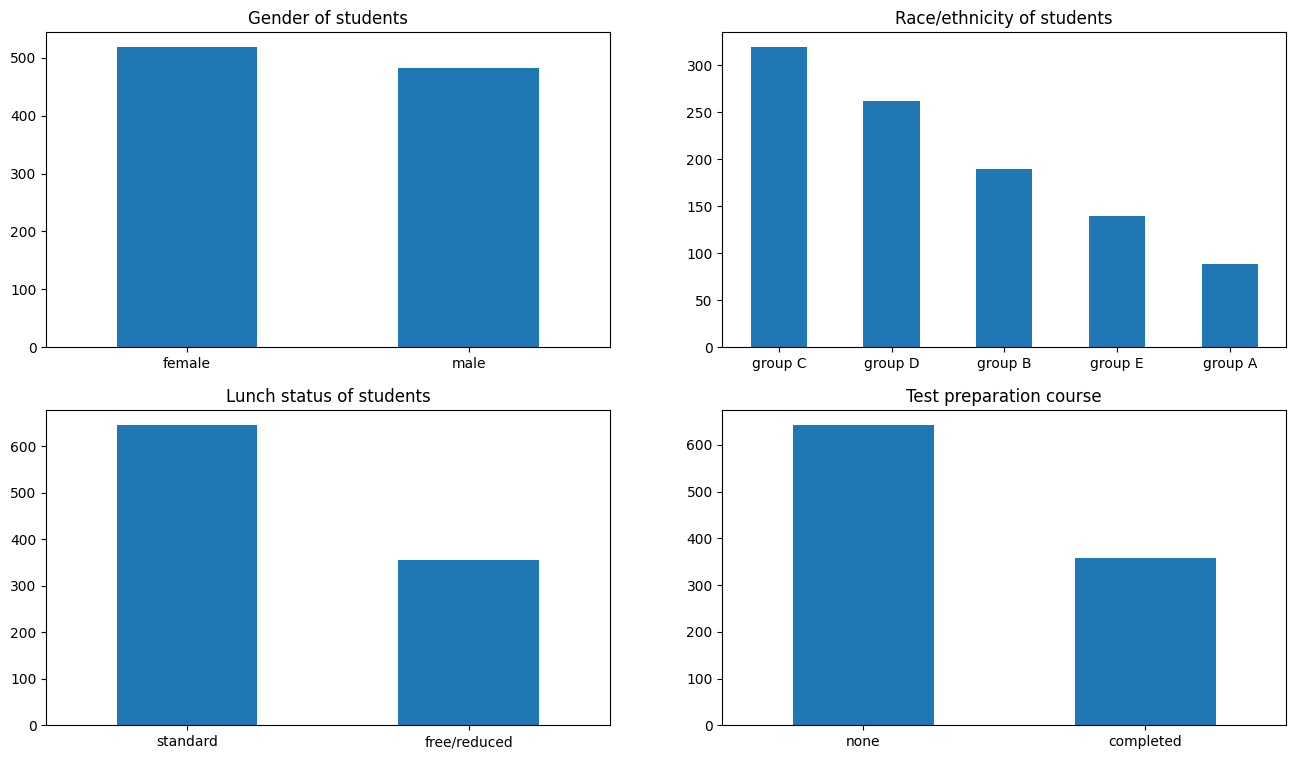

In [19]:
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')
plt.xticks(rotation=0)

plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')
plt.xticks(rotation=0)

plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')
plt.xticks(rotation=0)

plt.show()

Continuing with <code>Univariate Analysis</code>, next, we will be making a boxplot of the numerical columns (math score, reading score, and writing score) in the dataset. A boxplot helps us in visualizing the data in terms of quartiles. It also identifies outliers in the dataset, if any. We will use the <code>boxplot()</code> function for this.

<AxesSubplot: >

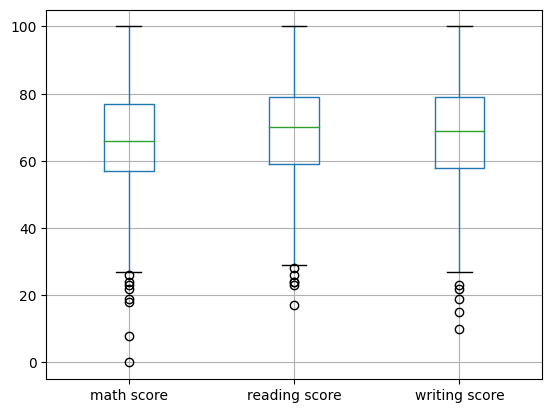

In [20]:
df.boxplot()

The middle portion represents the inter-quartile range (IQR). The horizontal green line in the middle represents the median of the data. The hollow circles near the tails represent outliers in the dataset. However, since it is very much possible for a student to score extremely low marks in a test, we will not remove these outliers.

We will now make a distribution plot of the math score of the students. A distribution plot tells us how the data is distributed. We will use the distplot function.

C:\Users\rmans\AppData\Local\Temp\ipykernel_20768\2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<AxesSubplot: xlabel='math score', ylabel='Density'>

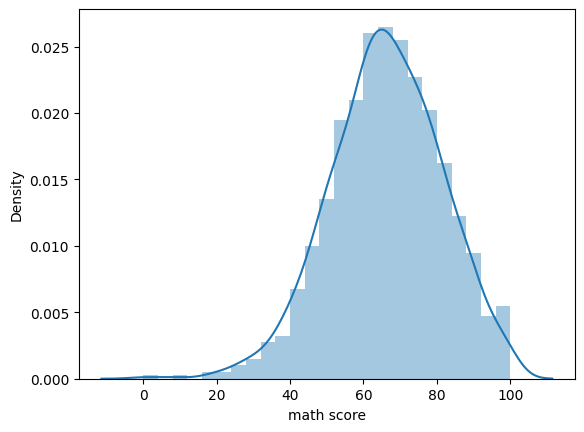

In [21]:
sns.distplot(df['math score'])

The graph represents a perfect bell curve closely. The peak is at around 65 marks, the mean of the math score of the students in the dataset. A similar distribution plot can also be made for reading scores and writing scores.

We will now look at the correlation between the 3 scores with the help of a heatmap. For this, we will use corr() and heatmap() function for this exercise.

C:\Users\rmans\AppData\Local\Temp\ipykernel_20768\1696804022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


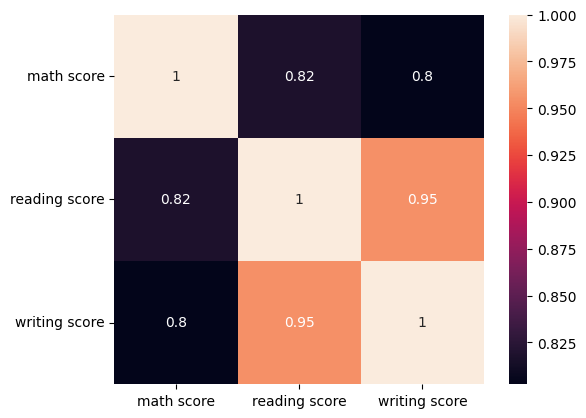

In [22]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

The heatmap shows that the 3 scores are highly correlated. Reading score has a correlation coefficient of 0.95 with the writing score. Math score has a correlation coefficient of 0.82 with the reading score, and 0.80 with the writing score.

We will now move on to <code>Bivariate Analysis</code>. We'll look at a <code>relational plot</code> in Seaborn. It helps us to understand the relationship between 2 variables on different subsets of the dataset. We will try to understand the relationship between the math score and the writing score of students of different genders.

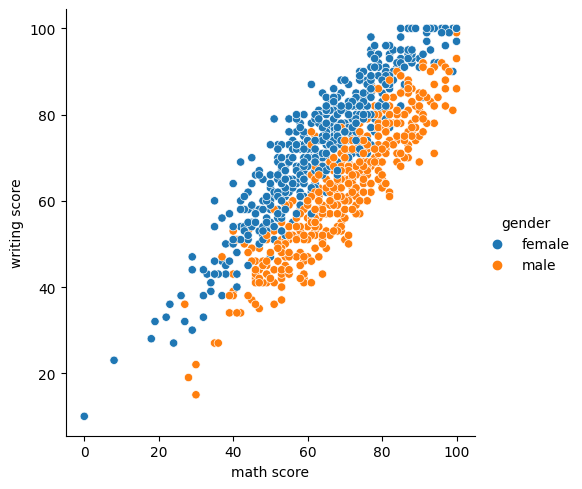

In [23]:
sns.relplot(x='math score', y='writing score', hue='gender', data=df)

The graph shows a clear difference in scores between the male and female students. For the same math score, female students are more likely to have a higher writing score than male students. However, for the same writing score, male students are expected to have a higher math score than female students.

Relational plots help us in conducting bivariate analysis. 

Finally, we will analyze students’ performance in math, reading, and writing based on the level of education of their parents and test preparation course. First, let us have a look at the impact of parents’ level of education on their child’s performance in school using a <code>line plot</code>.

<AxesSubplot: >

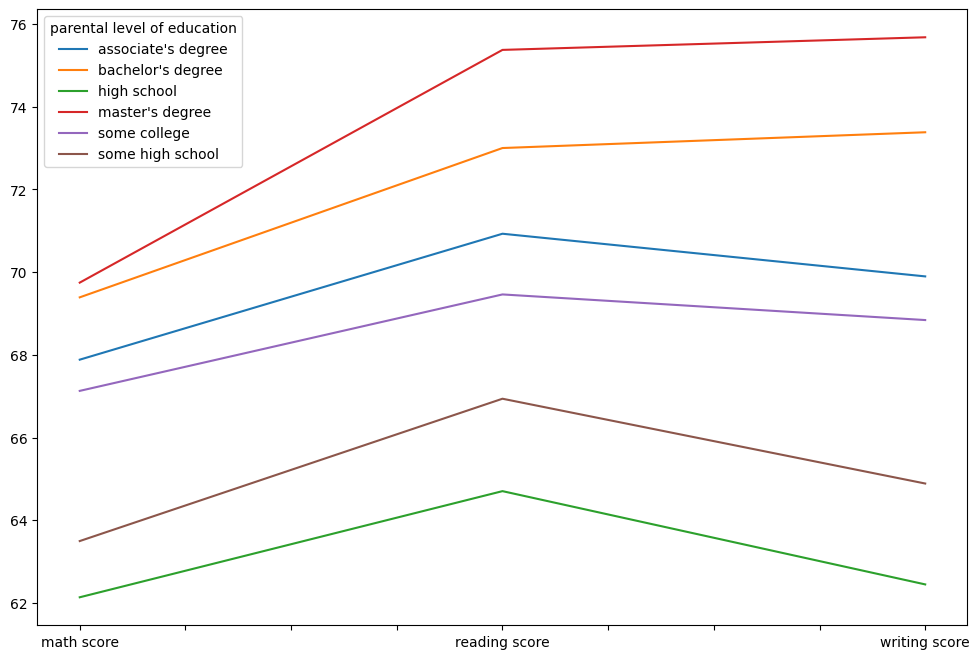

In [26]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

It is very clear from this graph that students whose parents are more educated than others (master’s degree, bachelor’s degree, and associate’s degree) are performing better on average than students whose parents are less educated (high school). This can be a genetic difference, or simply a difference in the students’ environment at home. More educated parents are more likely to push their students towards studies.

Secondly, let’s look at the impact of the test preparation course on students’ performance using a <code>horizontal bar graph.</code>

<AxesSubplot: >

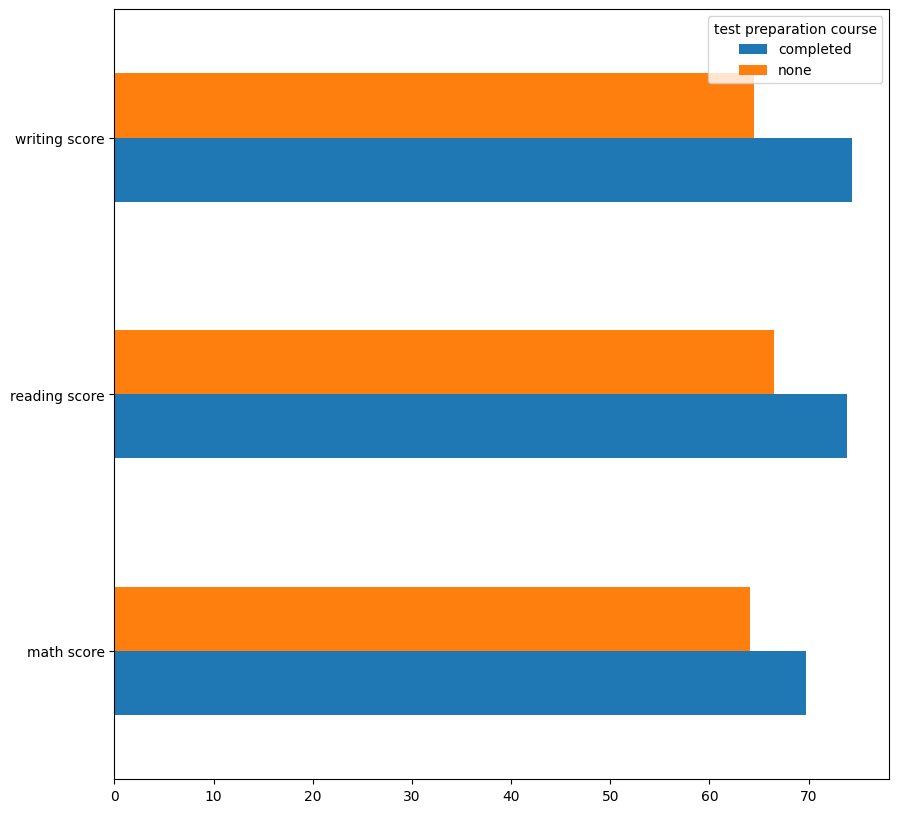

In [27]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))

Again, it is very clear that students who have completed the test preparation course have performed better, on average, as compared to students who have not opted for the course.

In [28]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
